In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

import MAS_library as pylians_MASL
import smoothing_library as pylians_SL
%matplotlib inline


# Histogram 3d

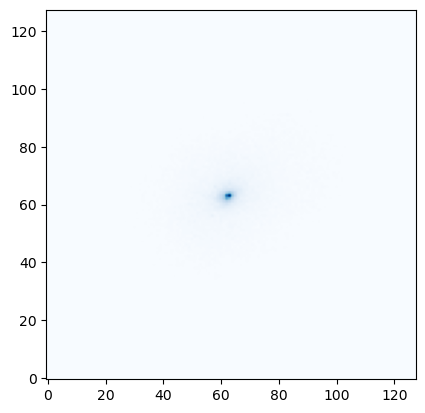

In [2]:
cutout = 'cutout_818916.hdf5'
f =  h5py.File(cutout,'r')

x = f['PartType1']['Coordinates'][:,0]
y = f['PartType1']['Coordinates'][:,1]
z = f['PartType1']['Coordinates'][:,2]

center = np.array([np.mean(x), np.mean(y), np.mean(z)]) # center of the box

x = x - center[0]
y = y - center[1]
z = z - center[2]

max_size = np.max([np.max(x) - np.min(x), np.max(y) - np.min(y), np.max(z) - np.min(z)])
max_size = max_size # size of the box (???)

grid_size = 128
pos = np.array([x, y, z]).T
hist, bins = np.histogramdd(pos, bins=grid_size, range=[[-max_size/2, max_size/2], [-max_size/2, max_size/2], [-max_size/2, max_size/2]])

plt.imshow(hist.sum(axis=2), origin='lower', cmap='Blues')

In [3]:
#test histogram: find cell with most particles, get it i,j,k and compare with a normal query to the positions

argmax = np.unravel_index(hist.argmax(), hist.shape)
i_test = argmax[0]
j_test = argmax[1]
z_test = argmax[2]

test_xmin, test_xmax = bins[0][i_test],bins[0][i_test+1]
test_ymin, test_ymax = bins[1][j_test],bins[1][j_test+1]
test_zmin, test_zmax = bins[2][z_test],bins[2][z_test+1]

test_hist = hist[i_test, j_test, z_test]

test_count = np.sum( (x > test_xmin) & (x < test_xmax) & (y > test_ymin) & (y < test_ymax) & (z > test_zmin) & (z < test_zmax) )

print(test_hist, test_count)

344.0 344


# Pylians3


Using CIC mass assignment scheme
Time taken = 0.003 seconds

200.68294 37524.01 37478.0 37524
(82, 22, 34)
[229.45133543014526, 61.56011438369751, 95.13835859298706]


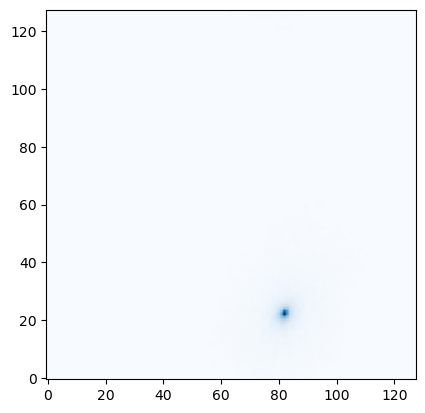

In [42]:
pos_f32 = pos + center #does not work with negative values, so centroid is added back
pos_f32 = pos_f32.astype(np.float32)

box_scale = 1.0

counts = np.zeros((grid_size,grid_size,grid_size), dtype=np.float32)
boxsize = np.float32(max_size)*box_scale

pylians_MASL.MA(pos_f32, counts, boxsize, "CIC", verbose=True)

plt.imshow(counts.sum(axis=2).T, origin='lower', cmap='Blues')

print(np.max(counts), np.sum(counts), np.sum(hist), len(x))

argmax = np.unravel_index(counts.argmax(), hist.shape)
print(argmax)
argmax = [i*boxsize/grid_size for i in argmax]
print(argmax)


Using CIC mass assignment scheme
Time taken = 0.000 seconds

7.0 14.0 37478.0 37524
(96, 96, 96)
[1.5, 1.5, 1.5]


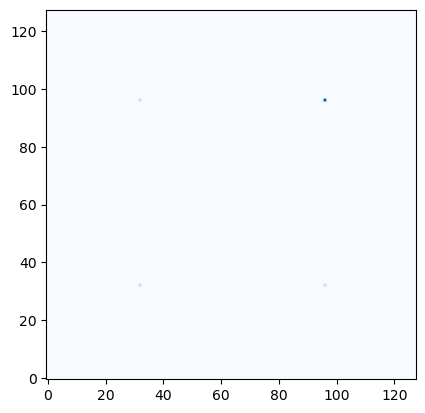

In [62]:
#pos_f32 = 
#make pos_f32 as unit cube beteen 0 and 1 for all coords
pos_f32 = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
    [1,1,1],
    [1,1,1],
    [1,1,1],
    [1,1,1],
    [1,1,1],
    [1,1,1]
])
pos_f32 = pos_f32 + [0.5,0.5,0.5]
pos_f32 = pos_f32.astype(np.float32)
max_size = 1


box_scale = 2

counts = np.zeros((grid_size,grid_size,grid_size), dtype=np.float32)
boxsize = np.float32(max_size)*box_scale

pylians_MASL.MA(pos_f32, counts, boxsize, "CIC", verbose=True)

plt.imshow(counts.sum(axis=2).T, origin='lower', cmap='Blues')

print(np.max(counts), np.sum(counts), np.sum(hist), len(x))

argmax = np.unravel_index(counts.argmax(), hist.shape)
print(argmax)
argmax = [i*boxsize/grid_size for i in argmax]
print(argmax)

In [43]:
center

array([10618.45549163, 28001.98172954, 61688.15556166])

# Pylians3 scale effect


Using CIC mass assignment scheme
Time taken = 0.003 seconds

200.68294 37524.01 37478.0 37524
BOX SCALE = 1; boxstep = 2.798187017440796
(82, 22, 34)
[229.45133543014526, 61.56011438369751, 95.13835859298706]

Using CIC mass assignment scheme
Time taken = 0.001 seconds

2108.9756 37524.004 37478.0 37524
BOX SCALE = 5; boxstep = 13.99093508720398
(119, 81, 58)
[1664.9212753772736, 1133.2657420635223, 811.4742350578308]

Using CIC mass assignment scheme
Time taken = 0.001 seconds

3119.4922 37523.98 37478.0 37524
BOX SCALE = 10; boxstep = 27.98187017440796
(123, 105, 29)
[3441.770031452179, 2938.0963683128357, 811.4742350578308]

Using CIC mass assignment scheme
Time taken = 0.001 seconds

16217.893 37524.047 37478.0 37524
BOX SCALE = 100; boxstep = 279.8187017440796
(38, 100, 92)
[10633.110666275024, 27981.87017440796, 25743.320560455322]

Using CIC mass assignment scheme
Time taken = 0.001 seconds

19645.383 37523.902 37478.0 37524
BOX SCALE = 500; boxstep = 1399.093508720398
(8, 20, 

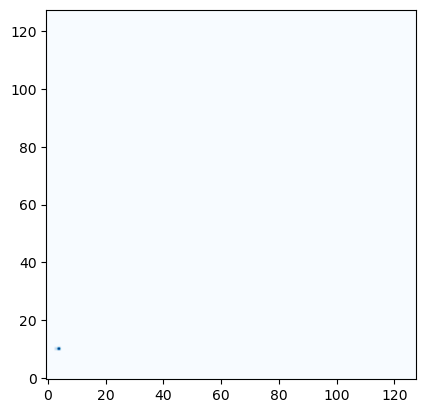

In [41]:
scales = [1, 5, 10, 100, 500, 1000]

argmax_coords = []

for scale in scales:
    pos_f32 = pos + center #does not work with negative values, so centroid is added back
    pos_f32 = pos_f32.astype(np.float32)

    counts = np.zeros((grid_size,grid_size,grid_size), dtype=np.float32)
    boxsize = np.float32(max_size)*scale

    pylians_MASL.MA(pos_f32, counts, boxsize, "CIC", verbose=True)

    plt.imshow(counts.sum(axis=2).T, origin='lower', cmap='Blues')

    print(np.max(counts), np.sum(counts), np.sum(hist), len(x))

    print(f'BOX SCALE = {scale}; boxstep = {boxsize/grid_size}')
    argmax_raw = np.unravel_index(counts.argmax(), hist.shape)
    print(argmax_raw)
    argmax = [i*boxsize/grid_size for i in argmax_raw]
    print(argmax)

    argmax_coords.append(argmax_raw)

print(argmax_coords)
